## Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

In [ ]:
import matplotlib.pyplot as plt

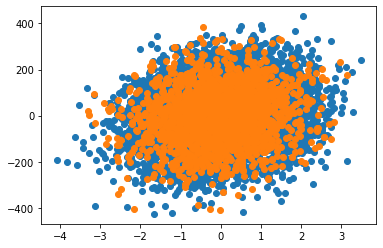

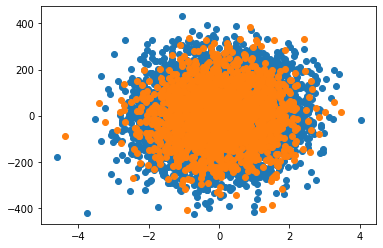

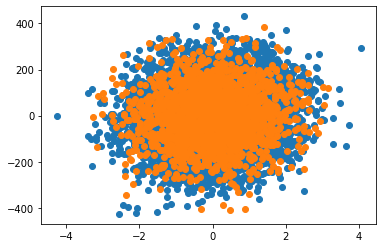

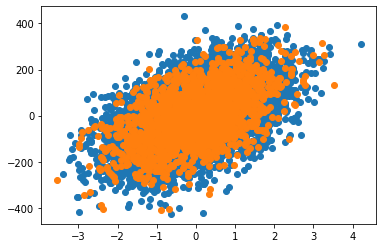

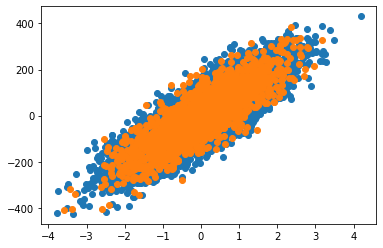

In [80]:
for i in range(5):
  plt.scatter(X_train[:,i], y_train)
  plt.scatter(X_test[:,i], y_test)
  plt.show()


## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

DISCLAIMER : THE NOTEBOOK DOES CONTAIN A LOT FO UNNECESSARY CODES WHICH ARE NOT NEEDED, I WAS JUST EXPERIMENTING.

In [ ]:
pip install -q seaborn

In [ ]:
import seaborn as sns

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
import numpy as np

In [ ]:
train_features= X_train.copy()
test_features= X_test.copy()

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[ 0.01066652 -0.00700641 -0.00033918 -0.0051576   0.0115292 ]]


In [ ]:
#first = np.array(train_features[:1])
five = np.array(train_features[:5])

with np.printoptions(precision=2, suppress=True):
  #print('First example:', first)
  print('Fifth example:', five)
  print()
  #print('Normalized:', normalizer(first).numpy())
  print('Normalized:', normalizer(five).numpy())

Fifth example: [[-0.38 -3.54  0.24  1.9  -1.17]
 [ 0.21  0.28  0.24 -2.92  0.86]
 [ 0.03 -0.12  0.24  1.03  0.49]
 [-0.25  0.61  0.74  2.02 -0.2 ]
 [ 0.67 -0.2  -1.14 -0.53 -0.69]]

Normalized: [[-0.39 -3.57  0.24  1.92 -1.17]
 [ 0.2   0.29  0.24 -2.93  0.84]
 [ 0.02 -0.11  0.24  1.04  0.48]
 [-0.26  0.63  0.74  2.05 -0.21]
 [ 0.66 -0.19 -1.14 -0.53 -0.7 ]]


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 224.558650
Feature 1: 25.609299
Feature 2: 53.371900
Feature 3: 2737.888212
Feature 4: 18737.378336


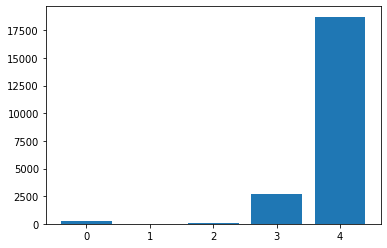

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.947


Site for reference : https://machinelearningmastery.com/feature-selection-for-regression-data/

In [ ]:
#class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
    self.dropout = tf.keras.layers.Dropout(0.5)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

#model = MyModel()

In [ ]:
feature4 = np.array(train_features[:,4])

feature4_normalizer = layers.Normalization(input_shape=[5,], axis=None)
feature4_normalizer.adapt(feature4)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
feature4_model = Sequential([
    Dense(5, activation='relu', input_shape=(5,)),
    Dense(5, activation='relu'),
    Dense(1, activation='softmax'),
])

feature4_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 30        
                                                                 
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
feature4_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.05),
    loss='mean_absolute_error')

In [85]:
model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.SGD(0.001))

history =model.fit(X_train,y_train,epochs=50,validation_split = 0.2,verbose=2)

predictions = model.predict(X_test)

Epoch 1/50
200/200 - 1s - loss: 13666.9561 - val_loss: 14230.2666 - 1s/epoch - 7ms/step
Epoch 2/50
200/200 - 1s - loss: 13666.9541 - val_loss: 14230.2666 - 566ms/epoch - 3ms/step
Epoch 3/50
200/200 - 1s - loss: 13666.9502 - val_loss: 14230.2666 - 509ms/epoch - 3ms/step
Epoch 4/50
200/200 - 0s - loss: 13666.9541 - val_loss: 14230.2666 - 486ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 13666.9521 - val_loss: 14230.2666 - 333ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 13666.9502 - val_loss: 14230.2666 - 321ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 13666.9541 - val_loss: 14230.2666 - 434ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 13666.9551 - val_loss: 14230.2666 - 339ms/epoch - 2ms/step
Epoch 9/50
200/200 - 0s - loss: 13666.9541 - val_loss: 14230.2666 - 314ms/epoch - 2ms/step
Epoch 10/50
200/200 - 0s - loss: 13666.9561 - val_loss: 14230.2666 - 326ms/epoch - 2ms/step
Epoch 11/50
200/200 - 0s - loss: 13666.9502 - val_loss: 14230.2666 - 322ms/epoch - 2ms/step


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

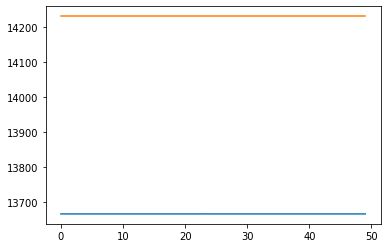

In [86]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [87]:
def r2_score(y_true, y_pred):
      y_mean = y_true.mean()
      return 1-(((y_true - y_pred)**2).mean())/(((y_true - y_mean)**2).mean())

accuracy = r2_score(y_test, predictions.flatten()) 
print("Accuracy:", accuracy)

Accuracy: -0.00020017784721870768


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

In [89]:
#Input of shape 5 with Dense layer of shape - 10,15,1

custom_model = Sequential([
    Dense(10, activation='relu', input_shape=(5,)),
    Dense(15, activation='relu'),
    Dense(1, activation='softmax'),
])
custom_model.compile(
       optimizer=tf.optimizers.Adam(learning_rate=0.001),
       loss='mean_absolute_error')

custom_history = custom_model.fit(
    X_train,y_train,
    validation_split=0.2,
    verbose=2, epochs=50)

Epoch 1/50
200/200 - 2s - loss: 93.1537 - val_loss: 95.2410 - 2s/epoch - 9ms/step
Epoch 2/50
200/200 - 1s - loss: 93.1537 - val_loss: 95.2410 - 769ms/epoch - 4ms/step
Epoch 3/50
200/200 - 0s - loss: 93.1538 - val_loss: 95.2410 - 465ms/epoch - 2ms/step
Epoch 4/50
200/200 - 0s - loss: 93.1538 - val_loss: 95.2410 - 490ms/epoch - 2ms/step
Epoch 5/50
200/200 - 0s - loss: 93.1537 - val_loss: 95.2410 - 335ms/epoch - 2ms/step
Epoch 6/50
200/200 - 0s - loss: 93.1537 - val_loss: 95.2410 - 337ms/epoch - 2ms/step
Epoch 7/50
200/200 - 0s - loss: 93.1538 - val_loss: 95.2410 - 346ms/epoch - 2ms/step
Epoch 8/50
200/200 - 0s - loss: 93.1538 - val_loss: 95.2410 - 344ms/epoch - 2ms/step
Epoch 9/50
200/200 - 0s - loss: 93.1537 - val_loss: 95.2410 - 329ms/epoch - 2ms/step
Epoch 10/50
200/200 - 0s - loss: 93.1537 - val_loss: 95.2410 - 332ms/epoch - 2ms/step
Epoch 11/50
200/200 - 0s - loss: 93.1537 - val_loss: 95.2410 - 332ms/epoch - 2ms/step
Epoch 12/50
200/200 - 0s - loss: 93.1538 - val_loss: 95.2410 - 339

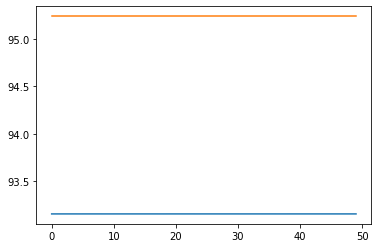

In [90]:
plt.plot(custom_history.history['loss'], label='loss')
plt.plot(custom_history.history['val_loss'], label='val_loss')

In [91]:
custom_predictions = custom_model.predict(X_test)
r2_score(y_test,custom_predictions)

-0.00020017784721915177

In [ ]:
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
history = feature4_model.fit(
    train_features[:,4],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

NameError: ignored

In [ ]:
model.compile(optimizer='sgd', loss='mse')